In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.initializers import HeNormal
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier

We open the data and prepare it

In [2]:
train_data = pd.read_csv("./datosImputados_con_XGBOOST.csv")
train_scores = pd.read_csv('./Y_train_1rknArQ.csv', index_col=0)
train_data_con_resultado =  pd.concat([train_data,train_scores],join='inner',axis=1) # Join together

In [3]:
# Define una función que transforme el resultado
def transform_result(row):
    if row['HOME_WINS'] == 1:
        return 'win'
    elif row['DRAW'] == 1:
        return 'draw'
    else:
        return 'lose'

# Aplica la función a cada fila del DataFrame
train_data_con_resultado['RESULT'] = train_data_con_resultado.apply(transform_result, axis=1)

train_data_con_resultado.drop(['HOME_WINS', 'DRAW', 'AWAY_WINS'], axis=1, inplace=True)
train_data_con_resultado.to_csv('train_data_limpios_XGBOOST.csv', index = False)

In [4]:
# Supongamos que tu DataFrame se llama df
df = pd.read_csv("train_data_limpios_XGBOOST.csv")  # Asegúrate de cargar tu archivo correctamente

# Preparar los datos
X = df.drop('RESULT', axis=1)  # Reemplaza 'columna_objetivo' con el nombre de tu columna de objetivo
y = df['RESULT']  # Esto es la columna con los valores 'lose', 'win', 'draw'

Once we have the data as we want, we scale the data and divide it between training and test, 80% training and 20% test

In [5]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic regression

In [7]:
# Entrenar un modelo de Regresión Logística
logreg = LogisticRegression(solver='saga', max_iter=10000, random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
acc_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Accuracy de Regresión Logística: {acc_logreg:.2f}')

Accuracy de Regresión Logística: 0.41


### Neural Network

We have tested different hyperparameters

In [4]:
# Crear el objeto LabelEncoder y transformar las etiquetas de texto a numéricas
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Codificar las etiquetas numéricas como one-hot
y_train_onehot = to_categorical(y_train_encoded)
y_test_onehot = to_categorical(y_test_encoded)

# Construir el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train_onehot.shape[1], activation='softmax'))  # El número de neuronas en la capa de salida corresponde al número de clases

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train_onehot, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Evaluar el modelo
_, acc_nn = model.evaluate(X_test_scaled, y_test_onehot)
print(f'Accuracy de la Red Neuronal: {acc_nn:.2f}')

Epoch 1/50
256/256 [==============================] - 1s 2ms/step - loss: 1.1392 - accuracy: 0.3781 - val_loss: 1.1023 - val_accuracy: 0.3976
Epoch 2/50
256/256 [==============================] - 0s 1ms/step - loss: 1.0476 - accuracy: 0.4576 - val_loss: 1.1226 - val_accuracy: 0.3932
Epoch 3/50
256/256 [==============================] - 0s 1ms/step - loss: 1.0067 - accuracy: 0.4925 - val_loss: 1.1344 - val_accuracy: 0.3844
Epoch 4/50
256/256 [==============================] - 0s 1ms/step - loss: 0.9700 - accuracy: 0.5253 - val_loss: 1.1587 - val_accuracy: 0.3899
Epoch 5/50
256/256 [==============================] - 0s 1ms/step - loss: 0.9256 - accuracy: 0.5689 - val_loss: 1.1807 - val_accuracy: 0.3789
Epoch 6/50
256/256 [==============================] - 0s 1ms/step - loss: 0.8787 - accuracy: 0.5978 - val_loss: 1.2128 - val_accuracy: 0.3811
Epoch 7/50
256/256 [==============================] - 0s 1ms/step - loss: 0.8248 - accuracy: 0.6392 - val_loss: 1.2791 - val_accuracy: 0.3601
Epoch 

In [5]:
model1 = Sequential()
model1.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(y_train_onehot.shape[1], activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history1 = model1.fit(X_train_scaled, y_train_onehot, epochs=100, batch_size=16, validation_split=0.1, verbose=1)
_, acc_nn1 = model1.evaluate(X_test_scaled, y_test_onehot)
print(f'Accuracy del Modelo 1: {acc_nn1:.2f}')

Epoch 1/100
511/511 [==============================] - 3s 3ms/step - loss: 1.1562 - accuracy: 0.3826 - val_loss: 1.0888 - val_accuracy: 0.4097
Epoch 2/100
511/511 [==============================] - 1s 3ms/step - loss: 1.0945 - accuracy: 0.4055 - val_loss: 1.0805 - val_accuracy: 0.4339
Epoch 3/100
511/511 [==============================] - 1s 2ms/step - loss: 1.0858 - accuracy: 0.4219 - val_loss: 1.0796 - val_accuracy: 0.4317
Epoch 4/100
511/511 [==============================] - 1s 2ms/step - loss: 1.0797 - accuracy: 0.4288 - val_loss: 1.0799 - val_accuracy: 0.4317
Epoch 5/100
511/511 [==============================] - 2s 4ms/step - loss: 1.0793 - accuracy: 0.4311 - val_loss: 1.0761 - val_accuracy: 0.4317
Epoch 6/100
511/511 [==============================] - 2s 5ms/step - loss: 1.0788 - accuracy: 0.4315 - val_loss: 1.0787 - val_accuracy: 0.4317
Epoch 7/100
511/511 [==============================] - 2s 4ms/step - loss: 1.0750 - accuracy: 0.4349 - val_loss: 1.0770 - val_accuracy: 0.4317

Epoch 58/100
511/511 [==============================] - 1s 2ms/step - loss: 0.9362 - accuracy: 0.5335 - val_loss: 1.1279 - val_accuracy: 0.3337
Epoch 59/100
511/511 [==============================] - 1s 2ms/step - loss: 0.9335 - accuracy: 0.5315 - val_loss: 1.1353 - val_accuracy: 0.3370
Epoch 60/100
511/511 [==============================] - 1s 2ms/step - loss: 0.9210 - accuracy: 0.5439 - val_loss: 1.1360 - val_accuracy: 0.3304
Epoch 61/100
511/511 [==============================] - 1s 2ms/step - loss: 0.9319 - accuracy: 0.5328 - val_loss: 1.1322 - val_accuracy: 0.3447
Epoch 62/100
511/511 [==============================] - 1s 2ms/step - loss: 0.9257 - accuracy: 0.5405 - val_loss: 1.1384 - val_accuracy: 0.3260
Epoch 63/100
511/511 [==============================] - 1s 2ms/step - loss: 0.9234 - accuracy: 0.5342 - val_loss: 1.1452 - val_accuracy: 0.3348
Epoch 64/100
511/511 [==============================] - 1s 1ms/step - loss: 0.9090 - accuracy: 0.5559 - val_loss: 1.1463 - val_accuracy:

In [6]:
model2 = Sequential()
model2.add(Dense(100, input_dim=X_train_scaled.shape[1], activation='tanh'))
model2.add(Dense(50, activation='tanh'))
model2.add(Dense(y_train_onehot.shape[1], activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

history2 = model2.fit(X_train_scaled, y_train_onehot, epochs=50, batch_size=64, validation_split=0.2, verbose=1)
_, acc_nn2 = model2.evaluate(X_test_scaled, y_test_onehot)
print(f'Accuracy del Modelo 2: {acc_nn2:.2f}')

Epoch 1/50
114/114 [==============================] - 0s 2ms/step - loss: 1.1807 - accuracy: 0.3489 - val_loss: 1.1357 - val_accuracy: 0.3658
Epoch 2/50
114/114 [==============================] - 0s 2ms/step - loss: 1.1152 - accuracy: 0.3818 - val_loss: 1.1146 - val_accuracy: 0.3846
Epoch 3/50
114/114 [==============================] - 0s 2ms/step - loss: 1.0931 - accuracy: 0.3972 - val_loss: 1.1062 - val_accuracy: 0.3989
Epoch 4/50
114/114 [==============================] - 0s 2ms/step - loss: 1.0808 - accuracy: 0.4115 - val_loss: 1.1021 - val_accuracy: 0.4006
Epoch 5/50
114/114 [==============================] - 0s 2ms/step - loss: 1.0725 - accuracy: 0.4215 - val_loss: 1.0998 - val_accuracy: 0.4088
Epoch 6/50
114/114 [==============================] - 0s 2ms/step - loss: 1.0660 - accuracy: 0.4332 - val_loss: 1.0994 - val_accuracy: 0.4011
Epoch 7/50
114/114 [==============================] - 0s 2ms/step - loss: 1.0603 - accuracy: 0.4384 - val_loss: 1.0996 - val_accuracy: 0.4055
Epoch 

In [7]:
model3 = Sequential()
model3.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu', kernel_initializer=HeNormal()))
model3.add(BatchNormalization())
model3.add(Dense(64, activation='relu', kernel_initializer=HeNormal()))
model3.add(BatchNormalization())
model3.add(Dense(y_train_onehot.shape[1], activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history3 = model3.fit(X_train_scaled, y_train_onehot, epochs=75, batch_size=20, validation_split=0.15, verbose=1)
_, acc_nn3 = model3.evaluate(X_test_scaled, y_test_onehot)
print(f'Accuracy del Modelo 3: {acc_nn3:.2f}')


Epoch 1/75
386/386 [==============================] - 1s 2ms/step - loss: 1.2151 - accuracy: 0.3578 - val_loss: 1.1482 - val_accuracy: 0.3630
Epoch 2/75
386/386 [==============================] - 1s 1ms/step - loss: 1.0708 - accuracy: 0.4354 - val_loss: 1.1287 - val_accuracy: 0.3872
Epoch 3/75
386/386 [==============================] - 0s 1ms/step - loss: 1.0378 - accuracy: 0.4684 - val_loss: 1.1395 - val_accuracy: 0.3556
Epoch 4/75
386/386 [==============================] - 0s 1ms/step - loss: 1.0174 - accuracy: 0.4853 - val_loss: 1.1612 - val_accuracy: 0.3644
Epoch 5/75
386/386 [==============================] - 0s 1ms/step - loss: 0.9970 - accuracy: 0.5077 - val_loss: 1.1628 - val_accuracy: 0.3711
Epoch 6/75
386/386 [==============================] - 1s 1ms/step - loss: 0.9717 - accuracy: 0.5303 - val_loss: 1.1827 - val_accuracy: 0.3762
Epoch 7/75
386/386 [==============================] - 0s 1ms/step - loss: 0.9404 - accuracy: 0.5508 - val_loss: 1.2274 - val_accuracy: 0.3490
Epoch 

### SVC

In [3]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='auto')
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

acc_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy de SVM: {acc_svm:.2f}')

Accuracy de SVM: 0.44


In [9]:
# Cambio de hiperparámetros: C más alto, gamma 'scale' y probando un kernel polinomial
svm_model_adjusted = SVC(kernel='poly', C=10.0, gamma='scale', degree=3)
svm_model_adjusted.fit(X_train_scaled, y_train)
y_pred_svm_adjusted = svm_model_adjusted.predict(X_test_scaled)

acc_svm_adjusted = accuracy_score(y_test, y_pred_svm_adjusted)
print(f'Accuracy de SVM ajustado: {acc_svm_adjusted:.2f}')


Accuracy de SVM ajustado: 0.38


We optimize the hyperparameters

In [ ]:
param_distributions = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.1, 1, 10],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

random_search = RandomizedSearchCV(SVC(), param_distributions, n_iter=10, cv=5, scoring='accuracy', verbose=1, random_state=42)
random_search.fit(X_train_scaled, y_train)
print(f'Mejores hiperparámetros: {random_search.best_params_}')
print(f'Mejor score de accuracy: {random_search.best_score_:.2f}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
# Usar el mejor modelo para hacer predicciones sobre el conjunto de prueba
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy en el conjunto de prueba: {accuracy:.2f}')

### Random forest

In [7]:
# Entrenar un modelo de Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)  # No necesita escalar los datos para Random Forest
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy de Random Forest: {acc_rf:.2f}')

Accuracy de Random Forest: 0.42


### XGBoost

In [9]:
# Crear el objeto LabelEncoder
encoder = LabelEncoder()

# Ajustar el encoder a las etiquetas y transformarlas
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Ahora puedes usar estas etiquetas numéricas para entrenar XGBoost
xgb_clf = xgb.XGBClassifier(objective='multi:softprob', n_estimators=100, learning_rate=0.1, random_state=42)
xgb_clf.fit(X_train_scaled, y_train_encoded)
y_pred_xgb = xgb_clf.predict(X_test_scaled)

# Convertir predicciones numéricas de vuelta a etiquetas originales para la evaluación si es necesario
y_pred_labels = encoder.inverse_transform(y_pred_xgb)

# Evaluar el modelo
acc_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
print(f'Accuracy de XGBoost: {acc_xgb:.2f}')

Accuracy de XGBoost: 0.40


### Gradient boosting

In [14]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
print(f'Accuracy de Gradient Boosting: {acc_gb:.2f}')

Accuracy de Gradient Boosting: 0.42


### Stacking (random forest and SVC)

In [3]:
# Definir los estimadores para el StackingClassifier
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),  # RandomForest
    ('svc', SVC(kernel='rbf', C=1.0, gamma='auto', random_state=42))  # SVC con los parámetros específicos
]

# Configurar el StackingClassifier
clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression()
)

# Entrenar el modelo Stacking
clf.fit(X_train_scaled, y_train)

# Predecir con el modelo Stacking
y_pred_stack = clf.predict(X_test_scaled)

# Calcular la precisión del modelo
acc_stack = accuracy_score(y_test, y_pred_stack)
print(f'Accuracy de Stacking: {acc_stack:.2f}')

Accuracy de Stacking: 0.44


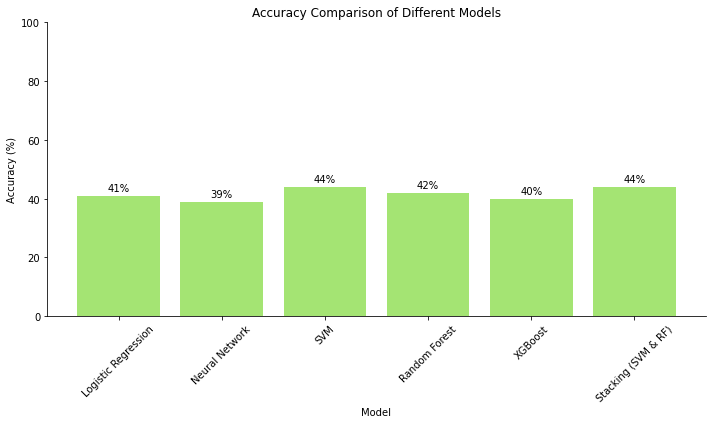

In [8]:
import matplotlib.pyplot as plt

# Datos: nombres de los modelos y sus precisiones correspondientes
model_names = ['Logistic Regression', 'Neural Network', 'SVM', 'Random Forest', 'XGBoost', 'Stacking (SVM & RF)']
accuracies = [41, 39, 44, 42, 40, 44]  # Precisión en porcentaje

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.bar(model_names, accuracies, color='#A4E473')  # Usar un verde clarito para todas las barras

# Añadir título y etiquetas a los ejes
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')

# Ajustar límites del eje y
plt.ylim(0, 100)

# Eliminar los bordes superior y derecho
ax = plt.gca()  # Obtener el contexto actual de los ejes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Añadir etiquetas de texto sobre cada barra con la precisión
for i in range(len(accuracies)):
    plt.text(i, accuracies[i] + 1, f'{accuracies[i]}%', ha='center', va='bottom')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar los nombres de los modelos para mejor visualización
plt.tight_layout()  # Ajustar automáticamente los parámetros de la subtrama
plt.show()
